In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u


In [2]:
def Blunitless(T,lamb):
    lamb5=(lamb.to(u.m))**5
    fac=const.h*const.c/(lamb.to(u.m)*const.k_B*T)
    bl=2.0*(const.c**2)*const.h/lamb5/(np.exp(fac)-1)
    return bl

In [9]:
tess=pd.read_csv("tess.csv",delimiter=",",names=["band","val"])
cheops=pd.read_csv("cheops.csv",delimiter=",",names=["band","val"])
#jasmine=pd.read_csv("trans180K_.txt",delimiter="\s",names=["band","val"]) #OLD
jasmine=pd.read_csv("total_throuput_2023March.txt",delimiter=",",names=["band","val"]) #OLD



In [10]:
jasmine["band"]

0     0.950000
1     0.958081
2     0.966162
3     0.974242
4     0.982323
        ...   
95    1.717677
96    1.725758
97    1.733838
98    1.741919
99    1.750000
Name: band, Length: 100, dtype: float64

In [5]:
from gollum.phoenix import PHOENIXSpectrum

In [6]:
spec = PHOENIXSpectrum(teff=3000, logg=5, wl_lo=5000.0,wl_hi=25000.)
normalized_spectrum = spec.instrumental_broaden(resolving_power=1_000).normalize()

In [7]:
flux=normalized_spectrum.flux
lamb=normalized_spectrum.spectral_axis*1.e-4
photonflux=flux*lamb

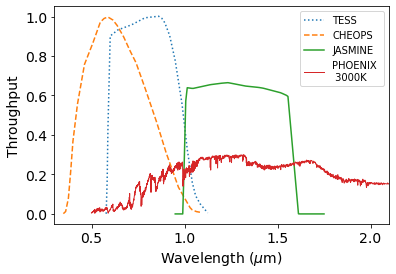

In [11]:
fig=plt.figure()
ax=fig.add_subplot(111)
plt.plot(tess["band"],tess["val"],label="TESS",ls="dotted")
plt.plot(cheops["band"],cheops["val"],label="CHEOPS",ls="dashed")
plt.plot(jasmine["band"],jasmine["val"],label="JASMINE")
#plt.fill_between([1.1,1.8],0.0,1.0,color="green",alpha=0.3)

fac=3.e-1
lambx=np.linspace(0.3,2.5,1000)*u.micron
#plt.plot(lambx,Blunitless(3000*u.K,lambx)*lambx*2.5e-13,color="black",ls="dashed",label="3000K \n black body",lw=0.5)
plt.plot(lamb,photonflux/np.max(photonflux)*fac,alpha=1.0,lw=1.0,color="C3",label="PHOENIX \n 3000K")
#plt.plot(lamb,Blunitless(6000*u.K,lamb)*0.02*fac,color="black",ls="dotted")
plt.xlim(0.3,2.1)
plt.xlabel("Wavelength ($\mu$m)",fontsize=14)
plt.ylabel("Throughput",fontsize=14)
#plt.text(1.3,0.5,"JASMINE",fontsize=16,color="green")
plt.legend(loc="upper right")
plt.tick_params(labelsize=14)
plt.savefig("comp.pdf", bbox_inches="tight", pad_inches=0.0)
plt.savefig("comp.png", bbox_inches="tight", pad_inches=0.0)

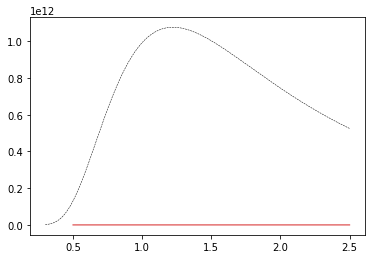

In [16]:
plt.plot(lambx,Blunitless(3000*u.K,lambx)*lambx,color="black",ls="dashed",label="3000K \n black body",lw=0.5)
plt.plot(lamb,photonflux,alpha=1.0,lw=1.0,color="C3",label="PHOENIX \n 3000K")

In [16]:
spec.instrumental_broaden(resolving_power=1_000).flux

<Quantity [1.37967487e+12, 1.37967747e+12, 1.37968306e+12, ...,
           5.38685432e+12, 5.38686280e+12, 5.38686702e+12] erg / (cm3 s)>